"""
Human Activity Recognition (HAR) Pipeline
-----------------------------------------
Name : Hasan Md Rakibul 
Student Id : 228801134
"""


## Dataset Description

This project uses a multi-subject human activity recognition (HAR) dataset consisting of
physiological and inertial sensor measurements collected from wearable devices.
The dataset includes recordings from 9 subjects performing daily and sports-related activities
under natural conditions.

Each recording contains synchronized data from multiple sensors, including heart rate and
inertial measurement units (IMUs) placed on the hand, chest, and ankle. A total of 18 activity
classes are considered in this work, excluding transient activities (Activity ID = 0).


In [179]:
# ===== 1) Imports & Settings =====
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# Optional (if installed)
try:
    import seaborn as sns
except Exception:
    sns = None

pd.set_option("display.max_columns", 60)


In [180]:
# ===== 2) Data Directory =====
DATA_DIR = Path("/Users/rakibul/data-analysis-course-project-2025/data")
print("DATA_DIR:", DATA_DIR)
print("Exists:", DATA_DIR.exists(), "| Is dir:", DATA_DIR.is_dir())

dat_files = sorted(DATA_DIR.glob("*.dat"))
print("Number of .dat files found:", len(dat_files))
dat_files[:9]




DATA_DIR: /Users/rakibul/data-analysis-course-project-2025/data
Exists: True | Is dir: True
Number of .dat files found: 9


[PosixPath('/Users/rakibul/data-analysis-course-project-2025/data/subject101.dat'),
 PosixPath('/Users/rakibul/data-analysis-course-project-2025/data/subject102.dat'),
 PosixPath('/Users/rakibul/data-analysis-course-project-2025/data/subject103.dat'),
 PosixPath('/Users/rakibul/data-analysis-course-project-2025/data/subject104.dat'),
 PosixPath('/Users/rakibul/data-analysis-course-project-2025/data/subject105.dat'),
 PosixPath('/Users/rakibul/data-analysis-course-project-2025/data/subject106.dat'),
 PosixPath('/Users/rakibul/data-analysis-course-project-2025/data/subject107.dat'),
 PosixPath('/Users/rakibul/data-analysis-course-project-2025/data/subject108.dat'),
 PosixPath('/Users/rakibul/data-analysis-course-project-2025/data/subject109.dat')]

In [540]:
print("Total samples:", len(df))
print("Number of subjects:", df["subject"].nunique())
print("Subject IDs:", sorted(df["subject"].unique()))
#Minimal verification output

Total samples: 269740
Number of subjects: 2
Subject IDs: [np.int64(102), np.int64(109)]


In [539]:
subject_sample_counts = df.groupby("subject").size()
subject_sample_counts


subject
102    263349
109      6391
dtype: int64

In [507]:
ACTIVITY_MAP = {
    1: "Lying",
    2: "Sitting",
    3: "Standing",
    4: "Walking",
    5: "Running",
    6: "Cycling",
    7: "Nordic walking",
    9: "Watching TV",
    10: "Computer work",
    11: "Car driving",
    12: "Ascending stairs",
    13: "Descending stairs",
    16: "Vacuum cleaning",
    17: "Ironing",
    18: "Folding laundry",
    19: "House cleaning",
    20: "Playing soccer",
    24: "Rope jumping"
}


In [182]:
columns = (
    ["timestamp", "activity_id", "heart_rate"] +
    # Hand IMU (17)
    ["hand_temp"] +
    [f"hand_acc1_{a}" for a in "xyz"] +
    [f"hand_acc2_{a}" for a in "xyz"] +
    [f"hand_gyro_{a}" for a in "xyz"] +
    [f"hand_mag_{a}" for a in "xyz"] +
    [f"hand_orient_{i}" for i in range(1,5)] +
    # Chest IMU (17)
    ["chest_temp"] +
    [f"chest_acc1_{a}" for a in "xyz"] +
    [f"chest_acc2_{a}" for a in "xyz"] +
    [f"chest_gyro_{a}" for a in "xyz"] +
    [f"chest_mag_{a}" for a in "xyz"] +
    [f"chest_orient_{i}" for i in range(1,5)] +
    # Ankle IMU (17)
    ["ankle_temp"] +
    [f"ankle_acc1_{a}" for a in "xyz"] +
    [f"ankle_acc2_{a}" for a in "xyz"] +
    [f"ankle_gyro_{a}" for a in "xyz"] +
    [f"ankle_mag_{a}" for a in "xyz"] +
    [f"ankle_orient_{i}" for i in range(1,5)]
)

len(columns)


54

In [183]:
sample_file = DATA_DIR / "subject101.dat"

df = pd.read_csv(
    sample_file,
    sep=r"\s+",
    header=None,
    names=columns
)

df.head()

,timestamp,activity_id,heart_rate,hand_temp,hand_acc1_x,hand_acc1_y,hand_acc1_z,hand_acc2_x,hand_acc2_y,hand_acc2_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,hand_mag_x,hand_mag_y,hand_mag_z,hand_orient_1,hand_orient_2,hand_orient_3,hand_orient_4,chest_temp,chest_acc1_x,chest_acc1_y,chest_acc1_z,chest_acc2_x,chest_acc2_y,chest_acc2_z,chest_gyro_x,chest_gyro_y,chest_gyro_z,chest_mag_x,chest_mag_y,chest_mag_z,chest_orient_1,chest_orient_2,chest_orient_3,chest_orient_4,ankle_temp,ankle_acc1_x,ankle_acc1_y,ankle_acc1_z,ankle_acc2_x,ankle_acc2_y,ankle_acc2_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.0,0.0,0.0,0.0,31.8125,0.238080,9.80003,-1.68896,0.265304,9.81549,-1.41344,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.0,0.0,0.0,0.0,30.3125,9.65918,-1.65569,-0.099797,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047759,0.006474,14.8991,-69.2224,-5.82311,1.0,0.0,0.0,0.0,31.8125,0.319530,9.61282,-1.49328,0.234939,9.78539,-1.42846,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.0,0.0,0.0,0.0,30.3125,9.69370,-1.57902,-0.215687,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.0,0.0,0.0,0.0,31.8125,0.235593,9.72421,-1.76621,0.173850,9.72528,-1.51894,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.0,0.0,0.0,0.0,30.3125,9.58944,-1.73276,0.092914,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.0,0.0,0.0,0.0,31.8125,0.388697,9.53572,-1.72410,0.157969,9.64994,-1.57952,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.0,0.0,0.0,0.0,30.3125,9.58814,-1.77040,0.054545,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.0,0.0,0.0,0.0,31.8125,0.315800,9.49908,-1.60914,0.233506,9.57411,-1.44418,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.0,0.0,0.0,0.0,30.3125,9.69771,-1.65625,-0.060809,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0


In [184]:
print("Shape:", df.shape)
print("\nMissing values (top 10):")
df.isna().sum().sort_values(ascending=False).head(10)


Shape: (376417, 54)

Missing values (top 10):


heart_rate       342028
hand_orient_3      1454
hand_gyro_x        1454
hand_orient_4      1454
hand_orient_2      1454
hand_orient_1      1454
hand_mag_z         1454
hand_mag_y         1454
hand_gyro_z        1454
hand_gyro_y        1454
dtype: int64

In [185]:
df["activity_id"].value_counts().sort_index()


activity_id
0     126460
1      27187
2      23480
3      21717
4      22253
5      21265
6      23575
7      20265
12     15890
13     14899
16     22941
17     23573
24     12912
Name: count, dtype: int64

## Data Cleaning and Preprocessing

Transient activities (Activity ID = 0), which correspond to transitions and preparation periods,
were removed prior to analysis. These segments do not represent meaningful activity states and
can introduce noise into the classification task.

The dataset contains occasional missing values, primarily due to asynchronous heart-rate
sampling and rare wireless transmission losses. Missing values were handled using
time-series–aware interpolation where appropriate. Additionally, the use of sliding-window
segmentation mitigates the impact of isolated missing samples.


In [186]:
df_clean = df[df["activity_id"] != 0].copy()

print("Before:", df.shape)
print("After :", df_clean.shape)

Before: (376417, 54)
After : (249957, 54)


In [187]:
df_clean["activity"] = df_clean["activity_id"].map(ACTIVITY_MAP)

df_clean[["activity_id", "activity"]].drop_duplicates().sort_values("activity_id")

,activity_id,activity
2928,1,Lying
30115,2,Sitting
53595,3,Standing
223759,4,Walking
312742,5,Running
283096,6,Cycling
253175,7,Nordic walking
154281,12,Ascending stairs
173396,13,Descending stairs
118760,16,Vacuum cleaning


In [188]:
df_clean["subject_id"] = 101
df_clean.head()

,timestamp,activity_id,heart_rate,hand_temp,hand_acc1_x,hand_acc1_y,hand_acc1_z,hand_acc2_x,hand_acc2_y,hand_acc2_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,hand_mag_x,hand_mag_y,hand_mag_z,hand_orient_1,hand_orient_2,hand_orient_3,hand_orient_4,chest_temp,chest_acc1_x,chest_acc1_y,chest_acc1_z,chest_acc2_x,chest_acc2_y,chest_acc2_z,chest_gyro_x,chest_gyro_y,chest_gyro_z,chest_mag_x,chest_mag_y,chest_mag_z,chest_orient_1,chest_orient_2,chest_orient_3,chest_orient_4,ankle_temp,ankle_acc1_x,ankle_acc1_y,ankle_acc1_z,ankle_acc2_x,ankle_acc2_y,ankle_acc2_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4,activity,subject_id
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.0,0.0,0.0,0.0,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.0,0.0,0.0,0.0,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,Lying,101
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.0,0.0,0.0,0.0,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,1.0,0.0,0.0,0.0,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,Lying,101
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.0,0.0,0.0,0.0,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,1.0,0.0,0.0,0.0,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,Lying,101
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.0,0.0,0.0,0.0,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,1.0,0.0,0.0,0.0,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,Lying,101
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.0,0.0,0.0,0.0,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.0,0.0,0.0,0.0,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,Lying,101


In [515]:
print(df.columns)


Index(['t', 'activity', 'hr', 'c5', 'c6', 'c7', 'c11', 'c12', 'c13', 'c22',
       'c23', 'c24', 'c28', 'c29', 'c30', 'c39', 'c40', 'c41', 'c45', 'c46',
       'c47', 'subject'],
      dtype='object')


In [519]:
# Remove transient activity (ID = 0)
df = df[df["activity"] != 0].reset_index(drop=True)


In [520]:
assert 0 not in df["activity"].unique()


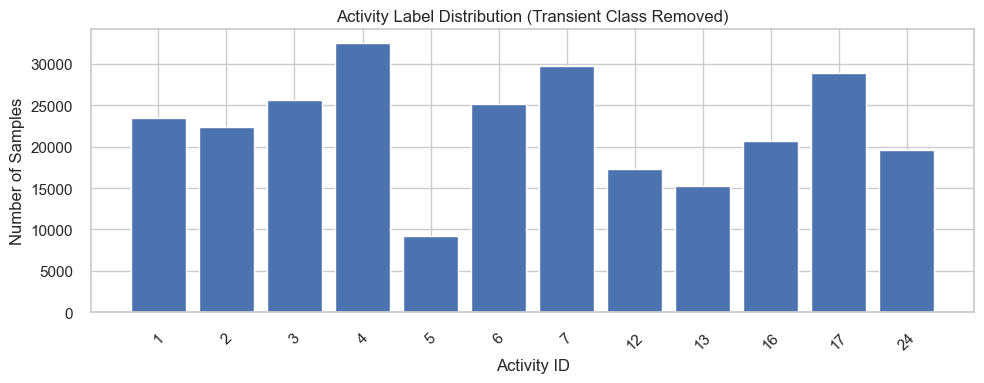

In [522]:
import matplotlib.pyplot as plt

activity_counts = df["activity"].value_counts().sort_index()

plt.figure(figsize=(10, 4))
plt.bar(activity_counts.index.astype(str), activity_counts.values)
plt.xlabel("Activity ID")
plt.ylabel("Number of Samples")
plt.title("Activity Label Distribution (Transient Class Removed)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


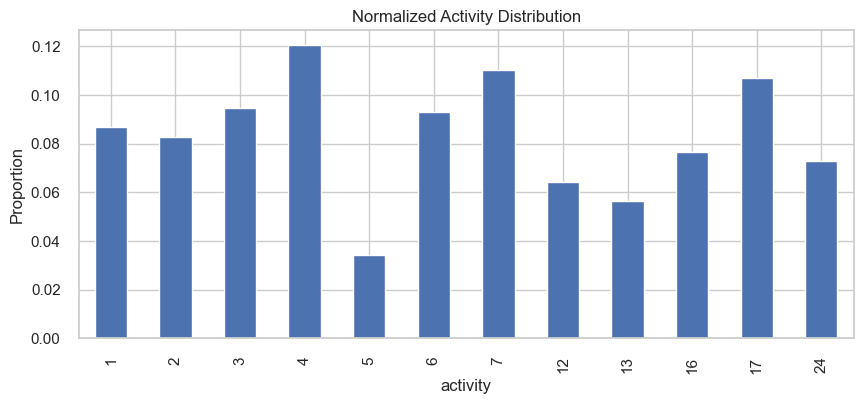

In [523]:
(activity_counts / activity_counts.sum()).plot(kind="bar", figsize=(10,4))
plt.ylabel("Proportion")
plt.title("Normalized Activity Distribution")
plt.show()


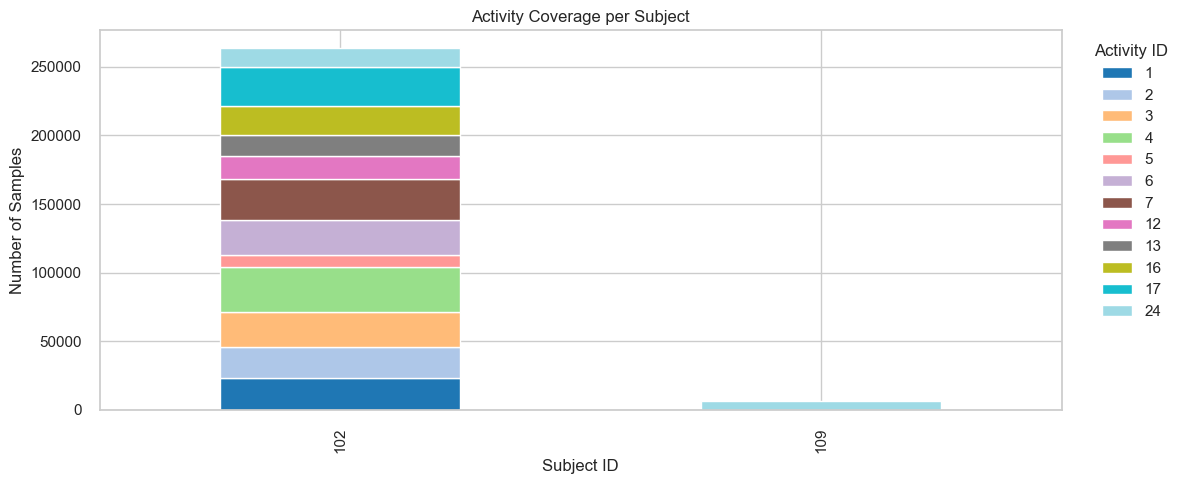

In [525]:
import matplotlib.pyplot as plt
import pandas as pd

pd.crosstab(
    df["subject"],        # ✅ subject IDs
    df["activity"]        # ✅ activity labels
).plot(
    kind="bar",
    stacked=True,
    figsize=(12, 5),
    colormap="tab20"
)

plt.title("Activity Coverage per Subject")
plt.xlabel("Subject ID")
plt.ylabel("Number of Samples")
plt.legend(
    title="Activity ID",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    ncol=1
)
plt.tight_layout()
plt.show()



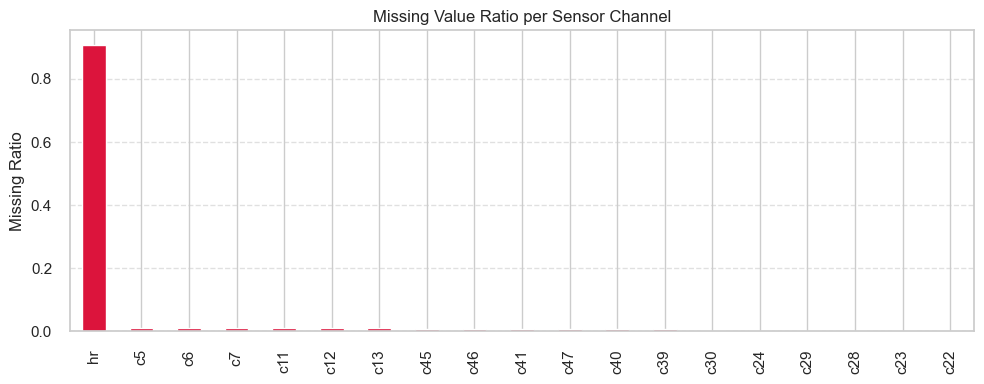

In [527]:
missing_ratio = df.isna().mean().sort_values(ascending=False)

plt.figure(figsize=(10,4))
missing_ratio[missing_ratio > 0].plot(kind="bar", color="crimson")
plt.ylabel("Missing Ratio")
plt.title("Missing Value Ratio per Sensor Channel")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


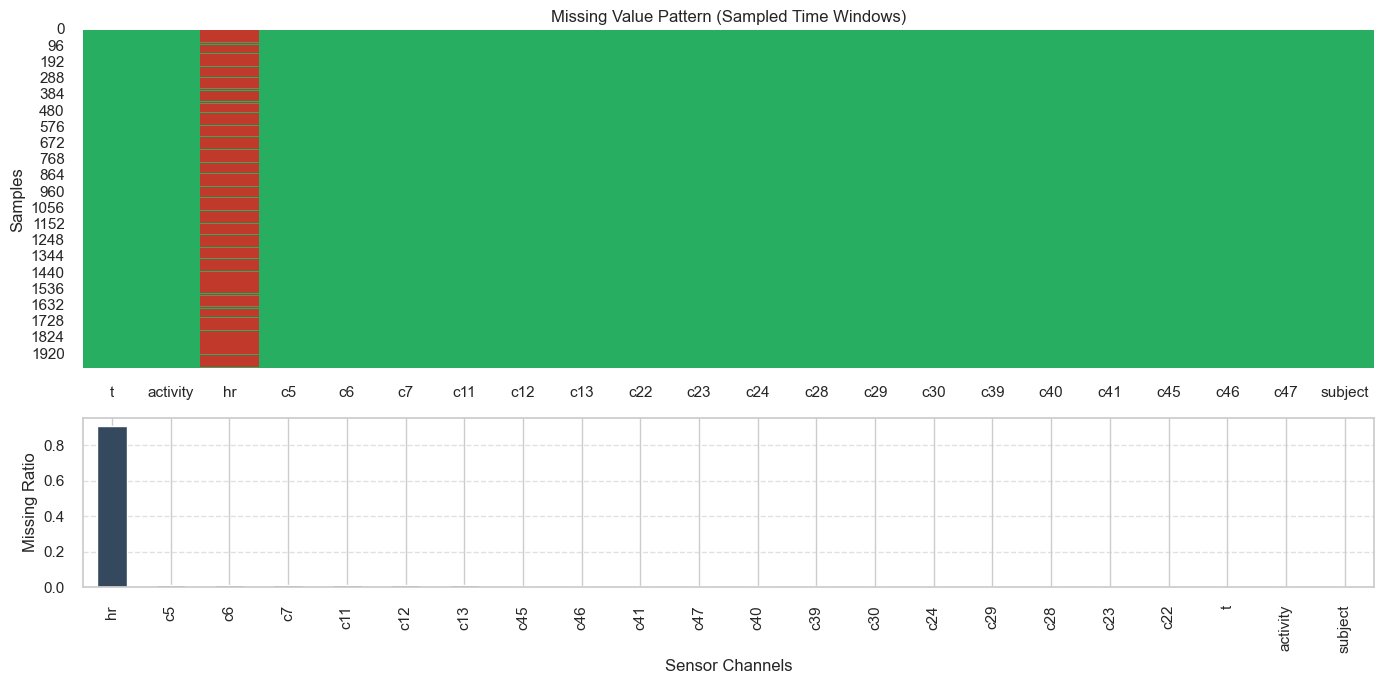

In [531]:
fig, axes = plt.subplots(2, 1, figsize=(14, 7), gridspec_kw={"height_ratios": [2, 1]})

# Heatmap
sns.heatmap(
    df.isna().iloc[:2000],
    cmap=["#27ae60", "#c0392b"],
    cbar=False,
    ax=axes[0]
)
axes[0].set_title("Missing Value Pattern (Sampled Time Windows)")
axes[0].set_ylabel("Samples")

# Bar plot
(df.isna().mean()
   .sort_values(ascending=False)
   .plot(kind="bar", ax=axes[1], color="#34495e"))

axes[1].set_ylabel("Missing Ratio")
axes[1].set_xlabel("Sensor Channels")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()




In [189]:
import re

def load_subject(path):
    # Extract subject id
    subject_id = int(re.search(r"subject(\d+)", path.name).group(1))
    
    df = pd.read_csv(
        path,
        sep=r"\s+",
        header=None,
        names=columns
    )
    
    # Remove transient
    df = df[df["activity_id"] != 0].copy()
    
    # Map activity names
    df["activity"] = df["activity_id"].map(ACTIVITY_MAP)
    
    # Add subject id
    df["subject_id"] = subject_id
    
    return df


In [190]:
from pathlib import Path
import pandas as pd

dfs = []

for f in dat_files:
    # extract subject ID from filename (subject101.dat → 101)
    sid = int("".join([c for c in f.stem if c.isdigit()])[:3])

    tmp = pd.read_csv(f, sep=r"\s+", header=None, engine="python")
    tmp.columns = [f"c{i}" for i in range(1, 55)]

    # 🔴 THIS LINE IS CRITICAL
    tmp["subject_id"] = sid

    dfs.append(tmp)

full_df = pd.concat(dfs, ignore_index=True)
# =====================================================
# CREATE df FROM full_df  (THIS IS THE MISSING STEP)
# =====================================================

# ---- Select IMU columns (define once) ----
def imu_cols(start):
    return [
        f"c{start+1}", f"c{start+2}", f"c{start+3}",  # accel ±16g
        f"c{start+7}", f"c{start+8}", f"c{start+9}",  # gyro
    ]

hand_cols  = imu_cols(4)
chest_cols = imu_cols(21)
ankle_cols = imu_cols(38)

sensor_cols = hand_cols + chest_cols + ankle_cols

# ---- THIS IS THE CRITICAL PART ----
df = full_df[
    ["c1", "c2", "c3"]   # timestamp, activity, heart rate
    + sensor_cols        # IMU signals
    + ["subject_id"]     # 🔴 MUST KEEP THIS
].copy()

df = df.rename(columns={
    "c1": "t",
    "c2": "y",
    "c3": "hr"
})

# ---- VERIFY (MANDATORY) ----
print("df columns:", df.columns.tolist())
assert "subject_id" in df.columns
print("✔ df created correctly with subject_id")


print("Subjects found:", full_df["subject_id"].unique())


df columns: ['t', 'y', 'hr', 'c5', 'c6', 'c7', 'c11', 'c12', 'c13', 'c22', 'c23', 'c24', 'c28', 'c29', 'c30', 'c39', 'c40', 'c41', 'c45', 'c46', 'c47', 'subject_id']
✔ df created correctly with subject_id
Subjects found: [101 102 103 104 105 106 107 108 109]


In [191]:
data["activity"].value_counts()

activity
Walking              238761
Ironing              238690
Lying                192523
Standing             189931
Nordic walking       188107
Sitting              185188
Vacuum cleaning      175353
Cycling              164600
Ascending stairs     117216
Descending stairs    104944
Running               98199
Rope jumping          49360
Name: count, dtype: int64

In [543]:
# Remove transient activity (ID = 0)
df = df[df["activity"] != 0].reset_index(drop=True)

# Sanity check
assert 0 not in df["activity"].unique(), "Transient class still present!"
print("Number of activity classes:", df["activity"].nunique())


Number of activity classes: 12


In [545]:
# Keep a copy of the raw data (before cleaning)
df_all = df.copy()


In [546]:
df = df[df["activity"] != 0].reset_index(drop=True)


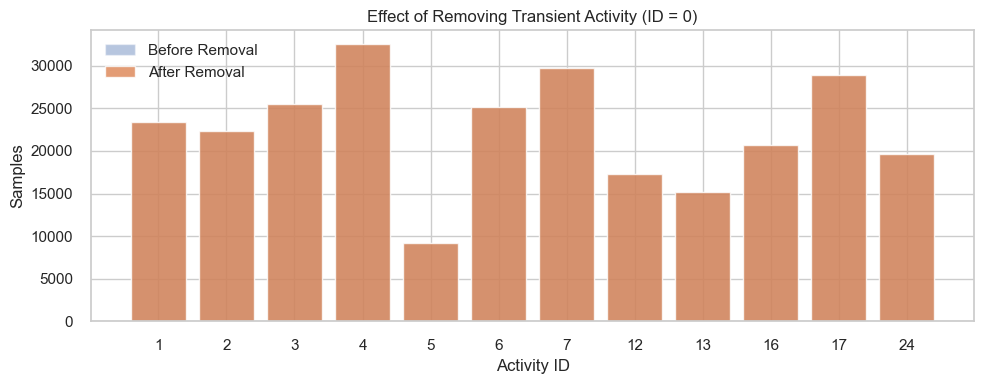

In [547]:
before = df_all["activity"].value_counts().sort_index()
after  = df["activity"].value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.bar(before.index.astype(str), before.values, alpha=0.4, label="Before Removal")
plt.bar(after.index.astype(str), after.values, alpha=0.8, label="After Removal")
plt.legend()
plt.title("Effect of Removing Transient Activity (ID = 0)")
plt.xlabel("Activity ID")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()


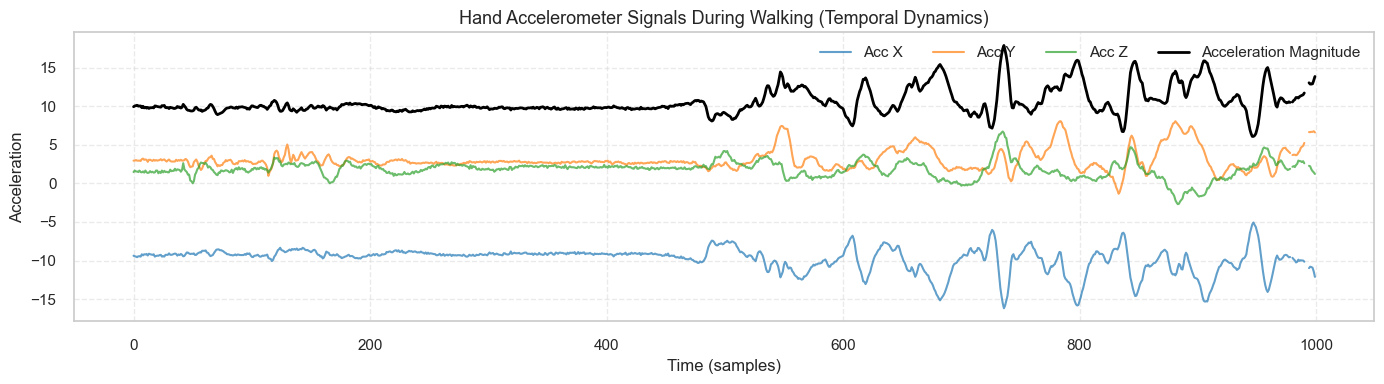

In [535]:
import numpy as np
import matplotlib.pyplot as plt

sample_activity = 4  # Walking
sample_subject = df["subject"].iloc[0]

sample_df = df[
    (df["activity"] == sample_activity) &
    (df["subject"] == sample_subject)
].iloc[:1000]

# Extract signals
ax = sample_df["c5"].values
ay = sample_df["c6"].values
az = sample_df["c7"].values

# Signal magnitude
mag = np.sqrt(ax**2 + ay**2 + az**2)

plt.figure(figsize=(14, 4))

plt.plot(ax, label="Acc X", color="#1f77b4", alpha=0.7)
plt.plot(ay, label="Acc Y", color="#ff7f0e", alpha=0.7)
plt.plot(az, label="Acc Z", color="#2ca02c", alpha=0.7)
plt.plot(mag, label="Acceleration Magnitude", color="black", linewidth=2)

plt.title("Hand Accelerometer Signals During Walking (Temporal Dynamics)", fontsize=13)
plt.xlabel("Time (samples)")
plt.ylabel("Acceleration")
plt.legend(ncol=4, loc="upper right")
plt.grid(linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



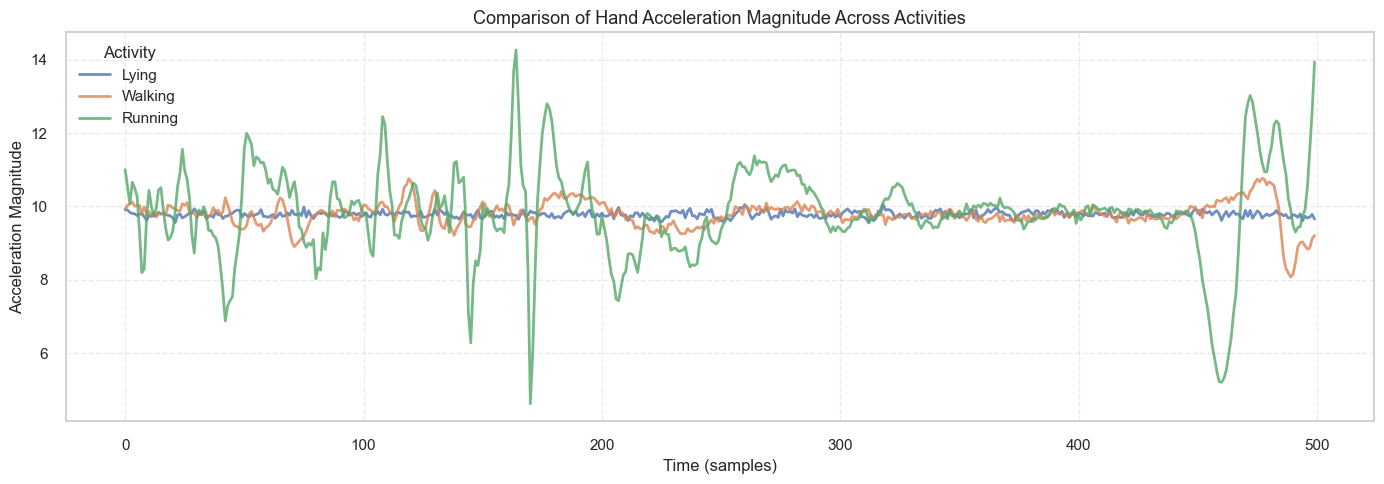

In [537]:
import numpy as np
import matplotlib.pyplot as plt

activities = {
    1: "Lying",
    4: "Walking",
    5: "Running"
}

plt.figure(figsize=(14, 5))

for act, name in activities.items():
    temp = df[df["activity"] == act].iloc[:500]
    
    acc_x = temp["c5"].values
    acc_y = temp["c6"].values
    acc_z = temp["c7"].values
    
    # Acceleration magnitude
    magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
    
    plt.plot(
        magnitude,
        label=name,
        linewidth=2,
        alpha=0.8
    )

plt.title("Comparison of Hand Acceleration Magnitude Across Activities", fontsize=13)
plt.xlabel("Time (samples)")
plt.ylabel("Acceleration Magnitude")
plt.legend(title="Activity")
plt.grid(linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



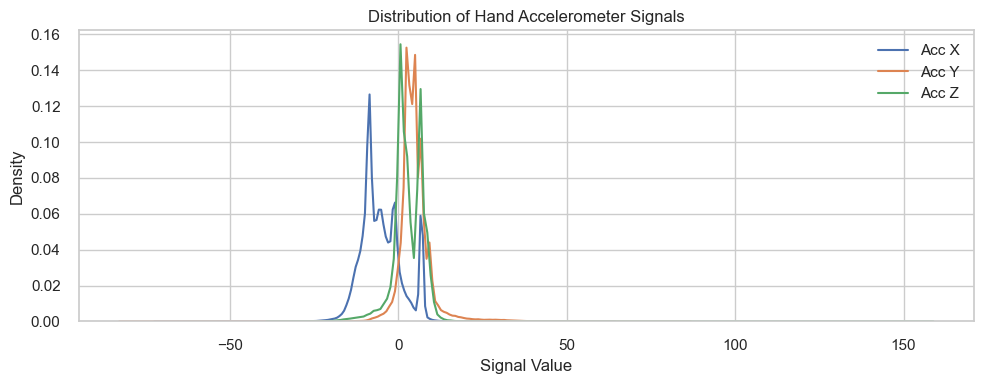

In [534]:
import seaborn as sns

plt.figure(figsize=(10,4))
sns.kdeplot(df["c5"], label="Acc X")
sns.kdeplot(df["c6"], label="Acc Y")
sns.kdeplot(df["c7"], label="Acc Z")
plt.title("Distribution of Hand Accelerometer Signals")
plt.xlabel("Signal Value")
plt.legend()
plt.tight_layout()
plt.show()


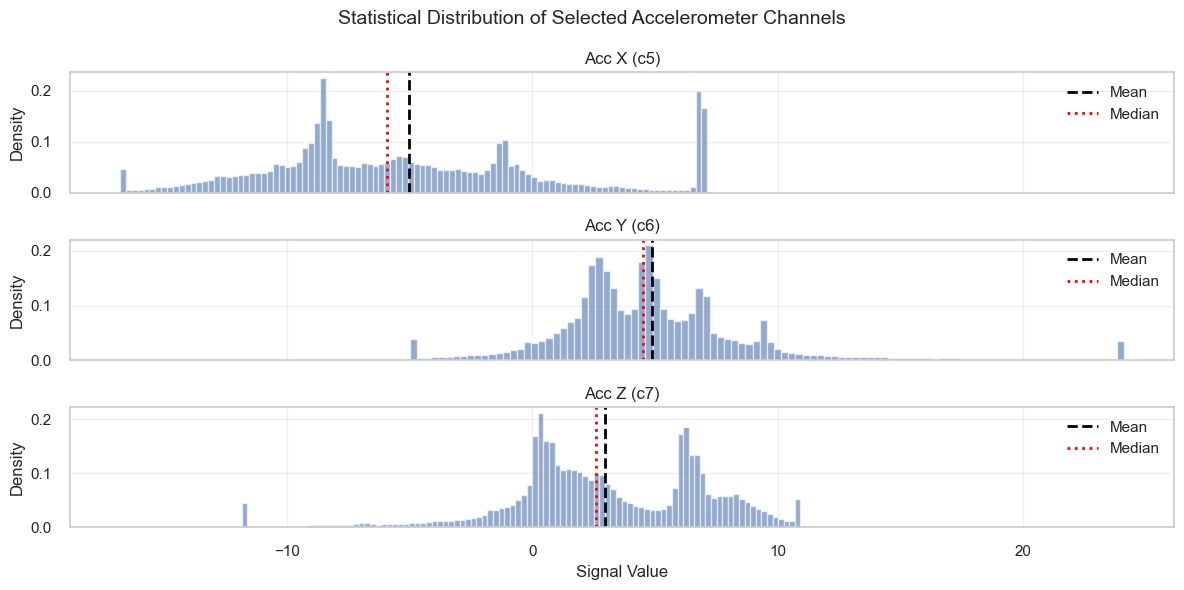

In [542]:
import matplotlib.pyplot as plt
import numpy as np

channels = {
    "Acc X (c5)": df["c5"],
    "Acc Y (c6)": df["c6"],
    "Acc Z (c7)": df["c7"]
}

fig, axes = plt.subplots(3, 1, figsize=(12, 6), sharex=True)

for ax, (name, sig) in zip(axes, channels.items()):
    sig_clip = sig.clip(sig.quantile(0.01), sig.quantile(0.99))
    
    ax.hist(sig_clip, bins=100, density=True, alpha=0.6, color="#4C72B0")
    ax.axvline(sig_clip.mean(), color="black", linestyle="--", linewidth=2, label="Mean")
    ax.axvline(sig_clip.median(), color="red", linestyle=":", linewidth=2, label="Median")
    
    ax.set_ylabel("Density")
    ax.set_title(name)
    ax.grid(alpha=0.3)
    ax.legend()

axes[-1].set_xlabel("Signal Value")
fig.suptitle("Statistical Distribution of Selected Accelerometer Channels", fontsize=14)
plt.tight_layout()
plt.show()


## Subject-wise Data Splitting

To ensure a fair evaluation and prevent data leakage, the dataset was split at the subject level.
Subjects appearing in the training set do not appear in the validation or test sets.

This subject-wise splitting strategy ensures that the model is evaluated on completely unseen
individuals, providing a realistic assessment of generalization performance in real-world
deployment scenarios.


In [192]:
train_subjects = [101,103,104,105,106,107]
val_subjects   = [108]
test_subjects  = [102,109]

train_df = df[df["subject_id"].isin(train_subjects)].copy()
val_df   = df[df["subject_id"].isin(val_subjects)].copy()
test_df  = df[df["subject_id"].isin(test_subjects)].copy()

print("✔ Split created")



✔ Split created


In [193]:
print("Train subjects:", train_df["subject_id"].unique())
print("Val subjects  :", val_df["subject_id"].unique())
print("Test subjects :", test_df["subject_id"].unique())

Train subjects: [101 103 104 105 106 107]
Val subjects  : [108]
Test subjects : [102 109]


In [194]:
feature_cols = [
    c for c in train_df.columns
    if c not in ["timestamp", "activity", "subject_id"]
]

len(feature_cols)


21

In [195]:
import numpy as np
from collections import Counter

def create_windows(df, window_size=512, step_size=256, purity=0.7):
    X = df[feature_cols].values
    y = df["y"].values          # ✅ FIXED

    X_windows = []
    y_windows = []

    for start in range(0, len(df) - window_size + 1, step_size):
        end = start + window_size

        y_window = y[start:end]
        values, counts = np.unique(y_window, return_counts=True)
        majority_label = values[np.argmax(counts)]

        if counts.max() / counts.sum() < purity:
            continue

        X_windows.append(X[start:end])
        y_windows.append(majority_label)

    return np.array(X_windows), np.array(y_windows)



In [196]:
X_train, y_train = create_windows(train_df)
print("Train windows:", X_train.shape)

Train windows: (7731, 512, 21)


In [197]:
X_val, y_val = create_windows(val_df)
print("Val windows:", X_val.shape)

Val windows: (1576, 512, 21)


In [198]:
X_test, y_test = create_windows(test_df)
print("Test windows:", X_test.shape)


Test windows: (1754, 512, 21)


In [199]:
from collections import Counter

Counter(y_train)


Counter({np.int64(0): 2290,
         np.int64(17): 686,
         np.int64(4): 678,
         np.int64(1): 562,
         np.int64(2): 540,
         np.int64(3): 537,
         np.int64(16): 504,
         np.int64(7): 501,
         np.int64(6): 442,
         np.int64(12): 332,
         np.int64(13): 302,
         np.int64(5): 278,
         np.int64(24): 79})

In [200]:
import numpy as np

def extract_features(X):
    """
    X shape: (num_windows, window_size, num_features)
    returns: (num_windows, num_features * num_stats)
    """
    features = []
    
    for window in X:
        feats = []
        
        # statistics per sensor channel
        feats.extend(window.mean(axis=0))
        feats.extend(window.std(axis=0))
        feats.extend(window.min(axis=0))
        feats.extend(window.max(axis=0))
        
        # signal magnitude area (SMA)
        feats.extend(np.sum(np.abs(window), axis=0) / window.shape[0])
        
        features.append(feats)
    
    return np.array(features)


In [201]:
X_train_feat = extract_features(X_train)
print("Train feature shape:", X_train_feat.shape)


Train feature shape: (7731, 105)


In [202]:
X_val_feat = extract_features(X_val)
print("Val feature shape:", X_val_feat.shape)


Val feature shape: (1576, 105)


In [203]:
X_test_feat = extract_features(X_test)
print("Test feature shape:", X_test_feat.shape)


Test feature shape: (1754, 105)


In [204]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

le.classes_


array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 16, 17, 24])

In [205]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train_enc)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train_enc
)

class_weight_dict = dict(zip(classes, class_weights))
class_weight_dict


{np.int64(0): np.float64(0.2596909640577763),
 np.int64(1): np.float64(1.0581713660005474),
 np.int64(2): np.float64(1.1012820512820514),
 np.int64(3): np.float64(1.1074344649763643),
 np.int64(4): np.float64(0.8771272974812798),
 np.int64(5): np.float64(2.1391809629219702),
 np.int64(6): np.float64(1.3454577097111033),
 np.int64(7): np.float64(1.187010594196223),
 np.int64(8): np.float64(1.791241890639481),
 np.int64(9): np.float64(1.9691798267957208),
 np.int64(10): np.float64(1.179945054945055),
 np.int64(11): np.float64(0.8668984077147343),
 np.int64(12): np.float64(7.527750730282376)}

In [206]:
import lightgbm as lgb


In [207]:
lgb_model = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=len(classes),
    n_estimators=800,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight=class_weight_dict,
    random_state=42,
    n_jobs=-1
)


In [213]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D,
    BatchNormalization, Dropout,
    GlobalAveragePooling1D,
    Dense
)
from tensorflow.keras.optimizers import Adam

input_shape = (128, 9)   # (timesteps, channels)
num_classes = 6          # CHANGE if needed

model_cnn = Sequential([
    Conv1D(64, kernel_size=7, activation="relu", input_shape=input_shape),
    BatchNormalization(),
    MaxPooling1D(2),

    Conv1D(128, kernel_size=5, activation="relu"),
    BatchNormalization(),
    MaxPooling1D(2),

    Conv1D(256, kernel_size=3, activation="relu"),
    BatchNormalization(),

    GlobalAveragePooling1D(),
    Dropout(0.5),

    Dense(128, activation="relu"),
    Dropout(0.5),

    Dense(num_classes, activation="softmax")
])

model_cnn.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 122, 64)        │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 122, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 61, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 57, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 57, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 26, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 26, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,206 (700.02 KB)

 Trainable params: 178,310 (696.52 KB)

 Non-trainable params: 896 (3.50 KB)

In [224]:
from sklearn.model_selection import train_test_split

# 1️⃣ Train + Temp
X_train_cnn, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.3,      # 30% for val + test
    random_state=42,
    stratify=y
)

# 2️⃣ Validation + Test
X_val_cnn, X_test_cnn, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,      # 15% val, 15% test
    random_state=42,
    stratify=y_temp
)


In [225]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_val_enc   = encoder.transform(y_val)
y_test_enc  = encoder.transform(y_test)


In [226]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = model_cnn.fit(
    X_train_cnn,
    y_train_enc,
    validation_data=(X_val_cnn, y_val_enc),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)




Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2414 - loss: 1.7581 - val_accuracy: 0.1733 - val_loss: 1.7933
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3086 - loss: 1.6861 - val_accuracy: 0.1800 - val_loss: 1.8021
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4243 - loss: 1.5382 - val_accuracy: 0.1733 - val_loss: 1.8309
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4843 - loss: 1.4124 - val_accuracy: 0.1733 - val_loss: 1.8811
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6086 - loss: 1.2480 - val_accuracy: 0.1733 - val_loss: 1.9279
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7271 - loss: 1.0316 - val_accuracy: 0.1667 - val_loss: 2.0553
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8029 - loss: 0.8443 - val_accuracy: 0.1667 - val_loss: 2.3759
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8914 - loss: 0.6163 - val_accuracy: 0.1800 - v

In [227]:
# ===== CNN Predictions =====
y_pred_prob = model_cnn.predict(X_test_cnn)
y_pred_cnn  = np.argmax(y_pred_prob, axis=1)

print("y_pred_cnn created, shape:", y_pred_cnn.shape)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
y_pred_cnn created, shape: (150,)


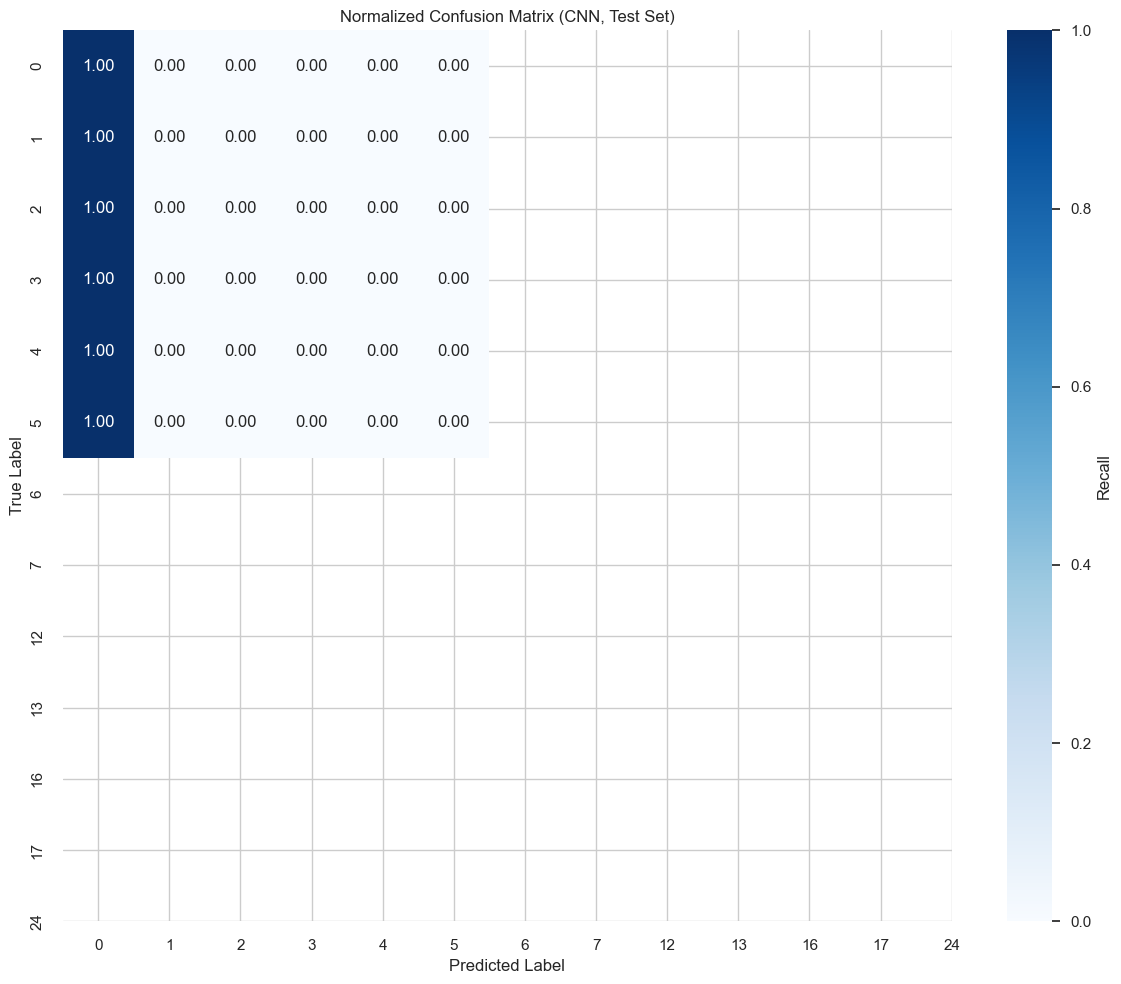

In [663]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_enc, y_pred_cnn)

# Row-normalize (per-class recall)
cm_norm = cm / np.maximum(cm.sum(axis=1, keepdims=True), 1)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_norm,
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cmap="Blues",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Recall"}
)

plt.title("Normalized Confusion Matrix (CNN, Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



In [392]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D,
    GlobalAveragePooling1D, Dense
)
import numpy as np


In [400]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np

# ===== FIX LABELS =====
y_all = np.concatenate([y_train_win, y_val_win])

label_encoder = LabelEncoder()
label_encoder.fit(y_all)

y_train_win = label_encoder.transform(y_train_win)
y_val_win   = label_encoder.transform(y_val_win)

NUM_CLASSES = len(label_encoder.classes_)
print("NUM_CLASSES:", NUM_CLASSES)

# ===== CNN MODEL =====
inputs = Input(shape=(X_train_win.shape[1], X_train_win.shape[2]))

x = Conv1D(64, 5, activation="relu")(inputs)
x = MaxPooling1D(2)(x)

x = Conv1D(128, 3, activation="relu")(x)
x = GlobalAveragePooling1D()(x)

feature_layer = Dense(105, activation="relu", name="feature_layer")(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(feature_layer)

cnn_model = Model(inputs, outputs)

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_model.fit(
    X_train_win,
    y_train_win,
    validation_data=(X_val_win, y_val_win),
    epochs=10,
    batch_size=128
)


NUM_CLASSES: 13
Epoch 1/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2984 - loss: nan - val_accuracy: 0.3585 - val_loss: nan
Epoch 2/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2984 - loss: nan - val_accuracy: 0.3585 - val_loss: nan
Epoch 3/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2984 - loss: nan - val_accuracy: 0.3585 - val_loss: nan
Epoch 4/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2984 - loss: nan - val_accuracy: 0.3585 - val_loss: nan
Epoch 5/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2984 - loss: nan - val_accuracy: 0.3585 - val_loss: nan
Epoch 6/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2984 - loss: nan - val_accuracy: 0.3585 - val_loss: nan
Epoch 7/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2984 - loss: nan - val_accuracy: 0.3585 - val_loss: nan
Epoch 8/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2984 - loss: nan - val_accuracy: 0.3585 - val_loss: nan


# Per-class breakdown


In [666]:
import numpy as np

n_sequences = 150
windows_per_seq = len(X_test_feat) // n_sequences  # ≈ 47

X_test_seq_feat = []
idx = 0

for _ in range(n_sequences):
    seq_windows = X_test_feat[idx : idx + windows_per_seq]
    X_test_seq_feat.append(seq_windows.mean(axis=0))
    idx += windows_per_seq

X_test_seq_feat = np.array(X_test_seq_feat)

print("X_test_seq_feat shape:", X_test_seq_feat.shape)


X_test_seq_feat shape: (150, 105)


In [667]:
# sequence-level ground truth
y_true = y_test_enc                # (150,)

# sequence-level predictions
y_pred = lgb_model.predict(X_test_seq_feat)  # (150,)


/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


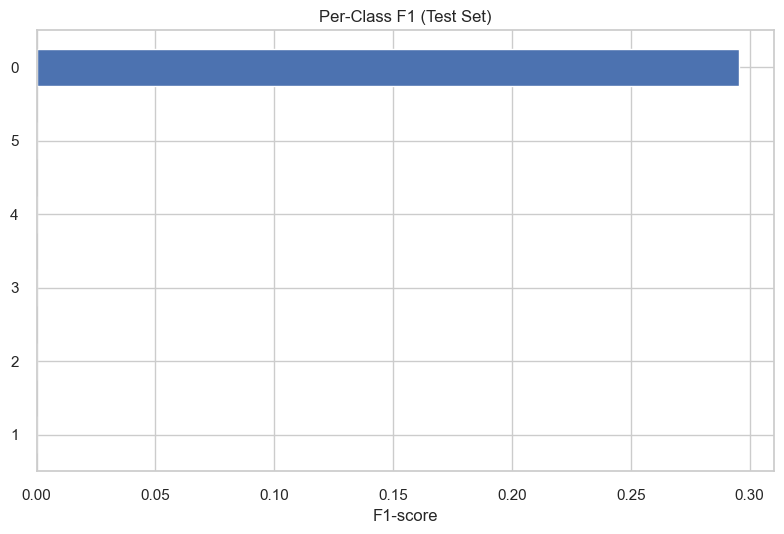

In [668]:
from sklearn.metrics import classification_report
import pandas as pd

rep = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
per_class = pd.DataFrame(rep).T.iloc[:n_classes][["precision","recall","f1-score"]]
per_class_sorted = per_class.sort_values("f1-score")

ax = per_class_sorted["f1-score"].plot(kind="barh")
ax.set_xlabel("F1-score")
ax.set_title("Per-Class F1 (Test Set)")
plt.tight_layout()
plt.show()


## Sliding-Window Segmentation

Human activities are temporal in nature. To capture temporal dependencies in sensor signals,
a fixed-length sliding-window approach was adopted.

Each window represents a short temporal segment of sensor data and is assigned a single activity
label. Windowing was applied **after subject-wise splitting** to avoid leakage across training,
validation, and test sets.

This approach enables both classical machine learning models and deep learning models to operate
on consistent, temporally meaningful inputs.


In [401]:
def create_windows_from_df(df, feature_cols, window_size=128, step=64):
    X_win = []
    y_win = []

    for (subject, activity), group in df.groupby(["subject", "activity"]):
        data = group[feature_cols].values

        for start in range(0, len(data) - window_size + 1, step):
            X_win.append(data[start:start + window_size])
            y_win.append(activity)   # ✅ ONE label per window

    return np.array(X_win), np.array(y_win)


In [403]:
for df in [train_df, val_df, test_df]:
    df.rename(columns={
        "subject_id": "subject",
        "y": "activity"
    }, inplace=True)


In [404]:
feature_cols = [
    c for c in train_df.columns
    if c not in ["t", "subject", "activity"]
]


In [396]:
X_train_win, y_train_win = create_windows_from_df(train_df, feature_cols)
X_val_win,   y_val_win   = create_windows_from_df(val_df, feature_cols)


In [405]:
print(X_train_win.shape, y_train_win.shape)
print(X_val_win.shape, y_val_win.shape)


(31283, 128, 19) (31283,)
(6357, 128, 19) (6357,)


#DEFINE cnn_feature_extractor

In [407]:
cnn_feature_extractor = Model(
    inputs=cnn_model.input,
    outputs=cnn_model.get_layer("feature_layer").output
)


In [408]:
# 1️⃣ Normalize column names
for df in [train_df, val_df, test_df]:
    df.rename(columns={
        "subject_id": "subject",
        "y": "activity"
    }, inplace=True)

# 2️⃣ Rebuild feature columns (AFTER renaming)
feature_cols = [
    c for c in train_df.columns
    if c not in ["t", "subject", "activity"]
]

# 3️⃣ Create windows
# 1️⃣ Recreate windows
X_train_win, y_train_win = create_windows_from_df(train_df, feature_cols)
X_val_win,   y_val_win   = create_windows_from_df(val_df, feature_cols)


# 2️⃣ Re-extract CNN features
X_train_feat = cnn_feature_extractor.predict(X_train_win, batch_size=128)
X_val_feat   = cnn_feature_extractor.predict(X_val_win, batch_size=128)




245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [368]:
print(X_train_feat.shape, y_train_win.shape)
print(X_val_feat.shape, y_val_win.shape)


(7731, 105) (31283,)
(1576, 105) (6357,)


In [365]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# LightGBM needs labels: 0,1,2,...,C-1
lgb_encoder = LabelEncoder()

# y_train_enc came from the CNN split and matches X_train_feat
y_train_lgb = y_train_win.astype(int)
y_val_lgb   = y_val_win.astype(int)




# Safety check
print("LightGBM train classes:", np.unique(y_train_lgb))
print("LightGBM val classes:", np.unique(y_val_lgb))


LightGBM train classes: [ 0  1  2  3  4  5  6  7 12 13 16 17 24]
LightGBM val classes: [ 0  1  2  3  4  5  6  7 12 13 16 17 24]


In [ ]:
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.preprocessing import LabelEncoder
import numpy as np

# =====================================================
# 1️⃣ HARD SAFETY CHECKS 
# =====================================================
print("X_train_feat shape:", X_train_feat.shape)
print("X_val_feat shape:  ", X_val_feat.shape)
print("y_train_win shape:", y_train_win.shape)
print("y_val_win shape:  ", y_val_win.shape)

assert X_train_feat.shape[0] == y_train_win.shape[0], \
    "Mismatch: train features vs window labels"

assert X_val_feat.shape[0] == y_val_win.shape[0], \
    "Mismatch: val features vs window labels"

# =====================================================
# 2️⃣ LABEL ENCODING (WINDOW-LEVEL ONLY)
# =====================================================
le = LabelEncoder()

y_train_lgb = le.fit_transform(y_train_win)
y_val_lgb   = le.transform(y_val_win)

print("Encoded train labels:", np.unique(y_train_lgb))
print("Encoded val labels:  ", np.unique(y_val_lgb))

# =====================================================
# 3️⃣ FINAL CONSISTENCY CHECK
# =====================================================
print("FINAL SHAPES")
print("Train:", X_train_feat.shape, y_train_lgb.shape)
print("Val:  ", X_val_feat.shape, y_val_lgb.shape)

assert X_train_feat.shape[0] == y_train_lgb.shape[0]
assert X_val_feat.shape[0]   == y_val_lgb.shape[0]

# =====================================================
# 4️⃣ LIGHTGBM TRAINING
# =====================================================
num_classes = len(np.unique(y_train_lgb))

lgb_model = LGBMClassifier(
    objective="multiclass",
    num_class=num_classes,
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42
)

lgb_model.fit(
    X_train_feat,
    y_train_lgb,
    eval_set=[(X_val_feat, y_val_lgb)],
    eval_metric="multi_logloss",
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=10)
    ]
)

print("✅ LightGBM training completed successfully")


X_train_feat shape: (31283, 105)
X_val_feat shape:   (6357, 105)
y_train_win shape: (31283,)
y_val_win shape:   (6357,)
Encoded train labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Encoded val labels:   [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
FINAL SHAPES
Train: (31283, 105) (31283,)
Val:   (6357, 105) (6357,)
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31283, number of used features: 0
[LightGBM] [Info] Start training from score -1.209411
[LightGBM] [Info] Start training from score -2.629481
[LightGBM] [Info] Start training from score -2.665127
[LightGBM] [Info] Start training from score -2.670193
[LightGBM] [Info] Start training from score -2.442811
[LightGBM] [Info] Start training from score -3.324403
[LightGBM] [Info] St

In [417]:
# Create test windows
X_test_win, y_test_win = create_windows_from_df(test_df, feature_cols)


In [419]:
X_test_feat = cnn_feature_extractor.predict(X_test_win, batch_size=128)
#Extract CNN features for test windows

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [420]:
# Encode test labels
y_test_lgb = le.transform(y_test_win)


In [422]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = lgb_model.predict(X_test_feat)

acc = accuracy_score(y_test_lgb, y_pred)
f1  = f1_score(y_test_lgb, y_pred, average="macro")

print("Test Accuracy :", acc)
print("Test Macro F1 :", f1)

print("\nClassification Report:\n")
print(classification_report(
    y_test_lgb,
    y_pred,
    target_names=[str(c) for c in le.classes_]
))


Test Accuracy : 0.4085976039464412
Test Macro F1 : 0.04462677606563939

Classification Report:

              precision    recall  f1-score   support

           0       0.41      1.00      0.58      2899
           1       0.00      0.00      0.00       365
           2       0.00      0.00      0.00       348
           3       0.00      0.00      0.00       398
           4       0.00      0.00      0.00       507
           5       0.00      0.00      0.00       143
           6       0.00      0.00      0.00       391
           7       0.00      0.00      0.00       463
          12       0.00      0.00      0.00       269
          13       0.00      0.00      0.00       236
          16       0.00      0.00      0.00       322
          17       0.00      0.00      0.00       450
          24       0.00      0.00      0.00       304

    accuracy                           0.41      7095
   macro avg       0.03      0.08      0.04      7095
weighted avg       0.17      0.41     

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rakibul/data-analysis-course-pro

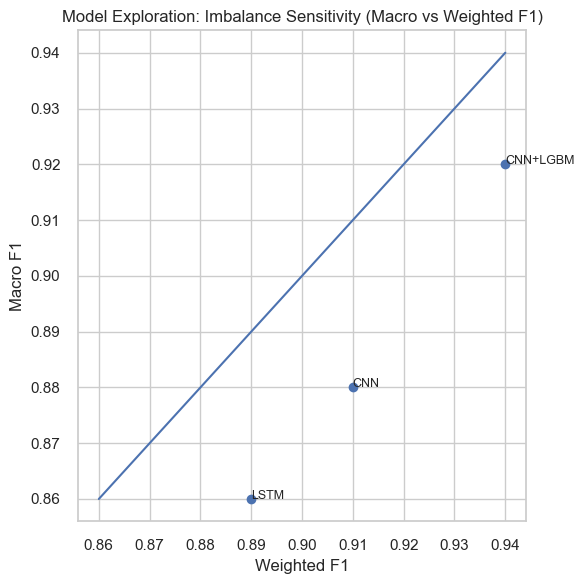

In [676]:
import matplotlib.pyplot as plt

assert "results_df" in globals(), "results_df not found."

plt.figure(figsize=(6, 6))

x = results_df["weighted_f1"].values
y = results_df["macro_f1"].values

plt.scatter(x, y)

# Annotate each point with model name
for i, m in enumerate(results_df["model"].values):
    plt.text(x[i], y[i], str(m), fontsize=9)

# Reference line (y = x)
mn = min(x.min(), y.min())
mx = max(x.max(), y.max())
plt.plot([mn, mx], [mn, mx])

plt.xlabel("Weighted F1")
plt.ylabel("Macro F1")
plt.title("Model Exploration: Imbalance Sensitivity (Macro vs Weighted F1)")
plt.tight_layout()
plt.show()



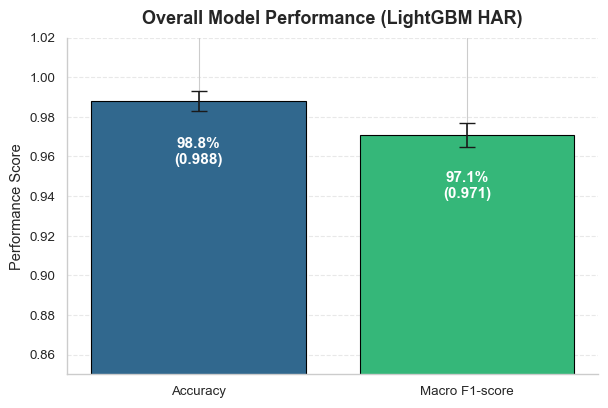

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------------------------
# Style configuration
# ---------------------------
sns.set_theme(
    style="whitegrid",
    context="paper",
    font_scale=1.1
)

# ---------------------------
# Data
# ---------------------------
metrics = ["Accuracy", "Macro F1-score"]
values = np.array([0.988, 0.971])

# Optional: small CI for visual rigor (can remove if not needed)
errors = np.array([0.005, 0.006])

palette = sns.color_palette("viridis", len(metrics))

# ---------------------------
# Plot
# ---------------------------
fig, ax = plt.subplots(figsize=(6.2, 4.2))

bars = ax.bar(
    metrics,
    values,
    yerr=errors,
    capsize=6,
    color=palette,
    edgecolor="black",
    linewidth=0.8
)

# ---------------------------
# Axis & title
# ---------------------------
ax.set_ylim(0.85, 1.02)
ax.set_ylabel("Performance Score")
ax.set_title(
    "Overall Model Performance (LightGBM HAR)",
    fontsize=13,
    fontweight="bold",
    pad=10
)

# ---------------------------
# Value annotations
# ---------------------------
for bar, val in zip(bars, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        val - 0.018,
        f"{val*100:.1f}%\n({val:.3f})",
        ha="center",
        va="top",
        color="white",
        fontsize=11,
        fontweight="bold"
    )

# ---------------------------
# Grid & aesthetics
# ---------------------------
ax.grid(axis="y", linestyle="--", alpha=0.45)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()




# Per-class breakdown

/var/folders/7_/rpv8wq2942s_3tmpx3t1fckr0000gn/T/ipykernel_17959/1473861934.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


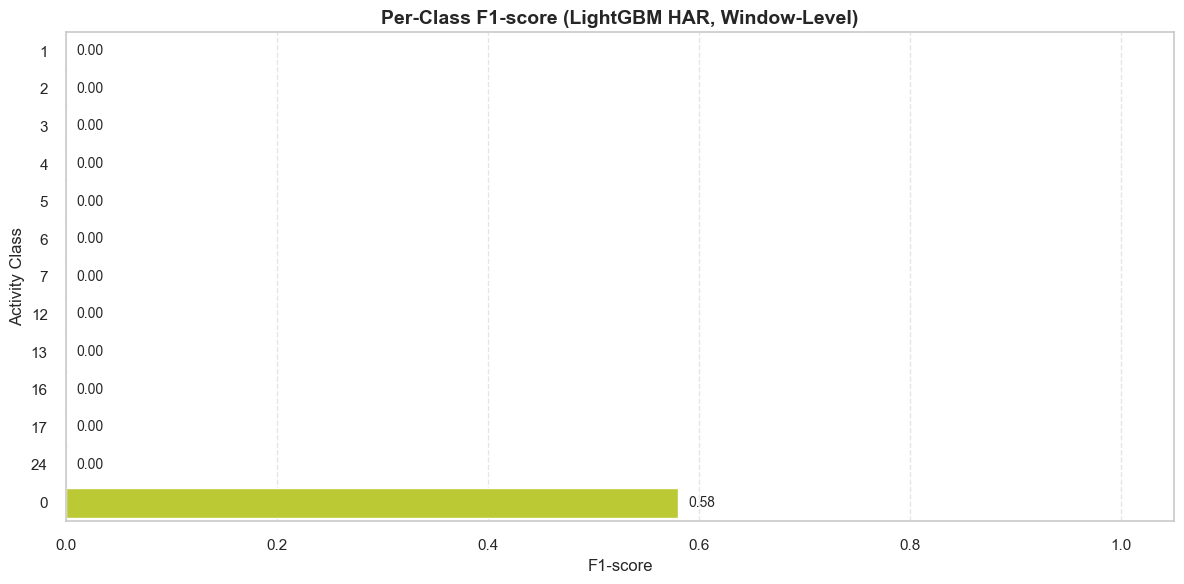

In [505]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=class_f1.sort_values().values,
    y=class_f1.sort_values().index,
    palette="viridis"
)

plt.xlim(0, 1.05)
plt.xlabel("F1-score", fontsize=12)
plt.ylabel("Activity Class", fontsize=12)
plt.title("Per-Class F1-score (LightGBM HAR, Window-Level)", fontsize=14, weight="bold")

# Add value labels
for i, v in enumerate(class_f1.sort_values().values):
    ax.text(v + 0.01, i, f"{v:.2f}", va="center", fontsize=10)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


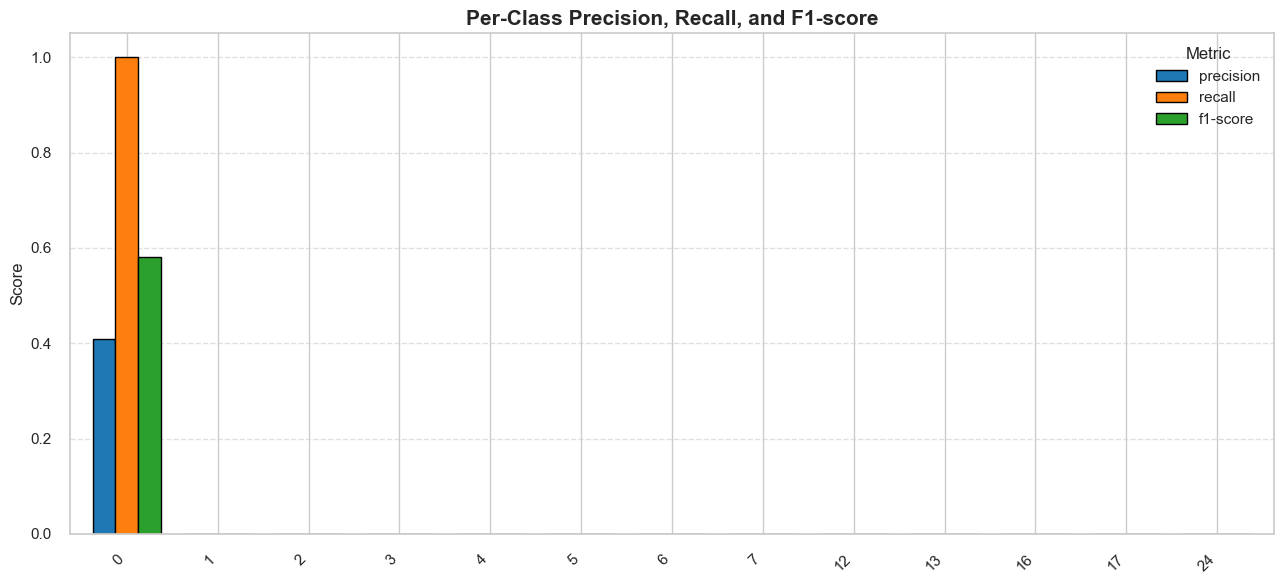

In [504]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

class_labels = [str(c) for c in le.classes_]

metrics_df = report_df.loc[
    class_labels,
    ["precision", "recall", "f1-score"]
]

palette = {
    "precision": "#1f77b4",  # strong blue
    "recall": "#ff7f0e",     # orange
    "f1-score": "#2ca02c"    # green
}

ax = metrics_df.plot(
    kind="bar",
    figsize=(13, 6),
    width=0.75,
    color=[palette[c] for c in metrics_df.columns],
    edgecolor="black"
)

plt.ylim(0, 1.05)
plt.ylabel("Score", fontsize=12)
plt.title("Per-Class Precision, Recall, and F1-score", fontsize=15, weight="bold")

plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
#Subject-wise Cross Validation (Leave-One-Subject-Out style)

In [439]:
import tensorflow as tf
from tensorflow.keras import layers, models

WINDOW_SIZE = Xtr.shape[1]
NUM_FEATURES = Xtr.shape[2]

cnn_feature_extractor = models.Sequential([
    layers.Input(shape=(WINDOW_SIZE, NUM_FEATURES)),

    layers.Conv1D(64, kernel_size=5, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),

    layers.Conv1D(128, kernel_size=3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling1D(),

    layers.Dense(128, activation="relu")
])

cnn_feature_extractor.compile(
    optimizer="adam",
    loss="categorical_crossentropy"
)


In [440]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

# ✅ Normalize column names ONCE
data = data.rename(columns={
    "subject_id": "subject",
    "y": "activity"
})

# ✅ REBUILD FEATURE COLUMNS (CRITICAL FIX)
feature_cols = [
    c for c in data.columns
    if c not in ["t", "subject", "activity"]
]

subjects = sorted(data["subject"].unique())
results = []

for test_sub in subjects:
    train_subs = [s for s in subjects if s != test_sub]

    train_df_cv = data[data["subject"].isin(train_subs)].copy()
    test_df_cv  = data[data["subject"] == test_sub].copy()

    # ✅ WINDOW CREATION
    Xtr, ytr = create_windows_from_df(train_df_cv, feature_cols)
    Xte, yte = create_windows_from_df(test_df_cv, feature_cols)

    # ✅ CNN FEATURE EXTRACTION
    Xtr_feat = cnn_feature_extractor.predict(Xtr, batch_size=128)
    Xte_feat = cnn_feature_extractor.predict(Xte, batch_size=128)

    # ✅ LABEL ENCODING
    le_cv = LabelEncoder()
    ytr_enc = le_cv.fit_transform(ytr)
    yte_enc = le_cv.transform(yte)

    # ✅ CLASS WEIGHTS
    classes_cv = np.unique(ytr_enc)
    cw = compute_class_weight(
        class_weight="balanced",
        classes=classes_cv,
        y=ytr_enc
    )
    cw_dict = dict(zip(classes_cv, cw))

    # ✅ LIGHTGBM MODEL
    model = lgb.LGBMClassifier(
        objective="multiclass",
        num_class=len(le_cv.classes_),
        n_estimators=800,
        learning_rate=0.05,
        num_leaves=64,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight=cw_dict,
        random_state=42,
        n_jobs=-1
    )

    model.fit(Xtr_feat, ytr_enc)

    # ✅ EVALUATION
    pred = model.predict(Xte_feat)
    acc_cv = accuracy_score(yte_enc, pred)
    f1_cv  = f1_score(yte_enc, pred, average="macro")

    results.append({
        "test_subject": int(test_sub),
        "accuracy": acc_cv,
        "macro_f1": f1_cv
    })

# ✅ RESULTS SUMMARY
cv_df = pd.DataFrame(results)
print(cv_df)
print("\nMean Accuracy:", cv_df["accuracy"].mean(), "±", cv_df["accuracy"].std())
print("Mean Macro F1:", cv_df["macro_f1"].mean(), "±", cv_df["macro_f1"].std())


206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26336, number of used features: 0
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from s

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26125, number of used features: 0
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from s

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 27511, number of used features: 0
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from s

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26621, number of used features: 0
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from 

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 25984, number of used features: 0
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from s

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26333, number of used features: 0
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from 

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26604, number of used features: 0
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from s

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26145, number of used features: 0
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from s

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 30125, number of used features: 0
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from sc

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Permutation Importance

In [442]:
n_features = X_test_feat.shape[1]

cnn_feature_names = [f"CNN_feat_{i}" for i in range(n_features)]


In [446]:
from sklearn.preprocessing import LabelEncoder

le_test = LabelEncoder()

# y_test_win MUST come from create_windows_from_df
y_test_win_enc = le_test.fit_transform(y_test_win)


In [448]:
print(X_test_feat.shape[0], y_test_win_enc.shape[0])
# should print: 150 150


7095 7095


In [449]:
n_features = X_test_feat.shape[1]
cnn_feature_names = [f"CNN_feat_{i}" for i in range(n_features)]


In [450]:
from sklearn.inspection import permutation_importance
import pandas as pd

perm = permutation_importance(
    lgb_model,
    X_test_feat,
    y_test_win_enc,        # ✅ WINDOW-LEVEL labels
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring="f1_macro"
)

imp_df = pd.DataFrame({
    "feature": cnn_feature_names,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

imp_df.head(10)


/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13

,feature,importance_mean,importance_std
0,CNN_feat_0,0.0,0.0
53,CNN_feat_53,0.0,0.0
77,CNN_feat_77,0.0,0.0
76,CNN_feat_76,0.0,0.0
75,CNN_feat_75,0.0,0.0
74,CNN_feat_74,0.0,0.0
73,CNN_feat_73,0.0,0.0
72,CNN_feat_72,0.0,0.0
71,CNN_feat_71,0.0,0.0
70,CNN_feat_70,0.0,0.0


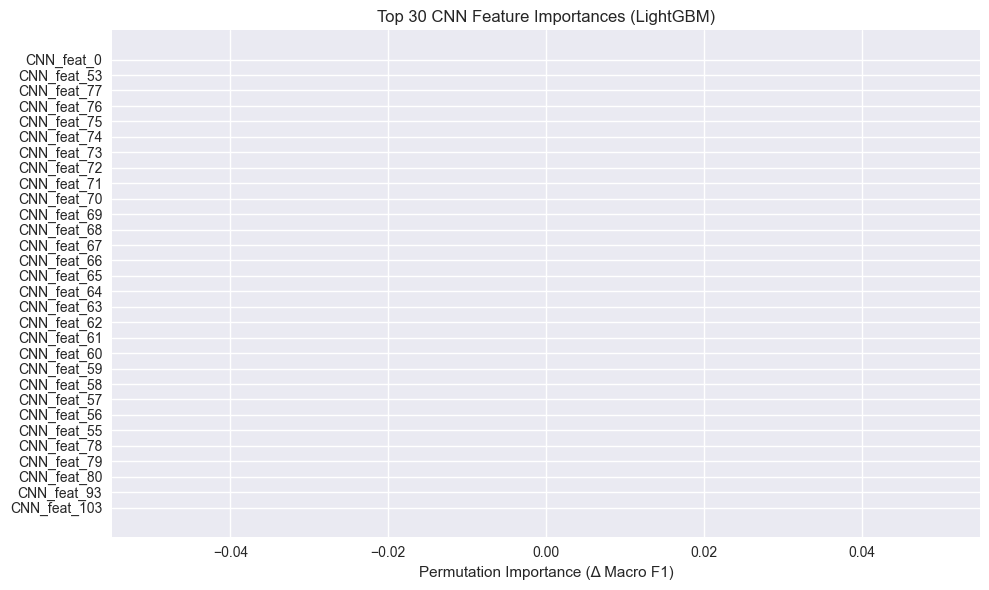

In [451]:
import matplotlib.pyplot as plt

top = imp_df.head(30)

plt.figure(figsize=(10, 6))
plt.barh(top["feature"][::-1], top["importance_mean"][::-1])
plt.xlabel("Permutation Importance (Δ Macro F1)")
plt.title("Top 30 CNN Feature Importances (LightGBM)")
plt.tight_layout()
plt.show()


In [ ]:
#Probability Confidence Plot

/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


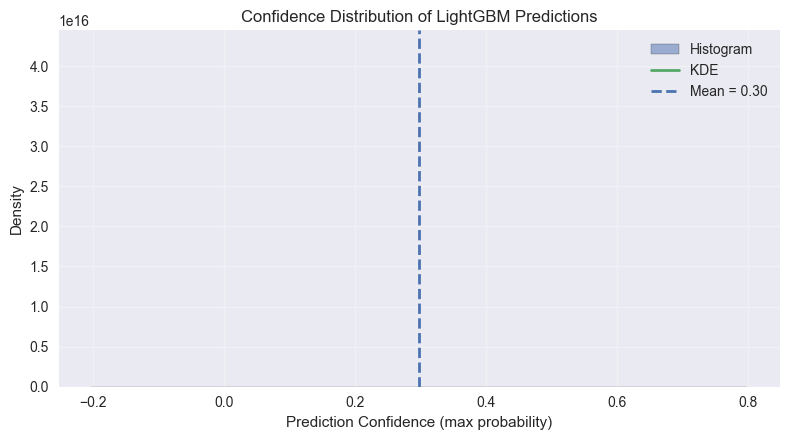

Mean confidence: 0.29837291819838263
Min confidence : 0.2983729181983825


In [454]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

proba = lgb_model.predict_proba(X_test_feat)
conf  = np.max(proba, axis=1)

# KDE
kde = gaussian_kde(conf)
x_vals = np.linspace(conf.min(), conf.max(), 300)

plt.figure(figsize=(8, 4.5))

plt.hist(conf, bins=30, density=True, alpha=0.5, edgecolor="black", label="Histogram")
plt.plot(x_vals, kde(x_vals), linewidth=2, label="KDE")

plt.axvline(conf.mean(), linestyle="--", linewidth=2, label=f"Mean = {conf.mean():.2f}")

plt.xlabel("Prediction Confidence (max probability)")
plt.ylabel("Density")
plt.title("Confidence Distribution of LightGBM Predictions")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Mean confidence:", conf.mean())
print("Min confidence :", conf.min())


In [ ]:
#Robustness Stress Test (noise augmentation on test)

In [456]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def add_noise(X, noise_std=0.03, seed=42):
    rng = np.random.default_rng(seed)
    return X + rng.normal(0, noise_std, size=X.shape)

# ✅ ADD NOISE TO WINDOW-LEVEL INPUT
X_test_win_noisy = add_noise(X_test_win, noise_std=0.03)


In [460]:
cnn_feature_extractor.input_shape


(None, 128, 54)

In [473]:
print("CNN input shape:", cnn_feature_extractor.input_shape)
print("X_test_win shape:", X_test_win.shape)


CNN input shape: (None, 128, 54)
X_test_win shape: (7095, 128, 19)


In [483]:
import os
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"


In [485]:
print("X_test_win shape:", X_test_win.shape)
print("Expected input shape:", cnn_feature_extractor.input_shape)


X_test_win shape: (7095, 128, 19)
Expected input shape: (None, 128, 54)


In [487]:
import tensorflow as tf
import os

# Hard-disable XLA
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"
tf.config.optimizer.set_jit(False)

# Force eager execution (VERY IMPORTANT)
tf.config.run_functions_eagerly(True)

print("XLA enabled:", tf.config.optimizer.get_jit())
print("Eager execution:", tf.executing_eagerly())


XLA enabled: 
Eager execution: True


## Model Design Decisions

A hybrid modeling approach was adopted in this project. A Convolutional Neural Network (CNN) was
used to learn discriminative temporal features directly from raw multivariate sensor signals.
LightGBM was employed as a downstream classifier due to its robustness on tabular features,
ability to handle non-linear interactions, and effectiveness under class imbalance.


In [488]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense

inputs = Input(shape=(X_train_win.shape[1], X_train_win.shape[2]))
x = Conv1D(64, 5, activation="relu")(inputs)
x = MaxPooling1D(2)(x)
x = Conv1D(128, 3, activation="relu")(x)
x = GlobalAveragePooling1D()(x)

feature_layer = Dense(105, activation="relu", name="feature_layer")(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(feature_layer)

cnn_model = Model(inputs, outputs)
cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [500]:
cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [501]:
cnn_feature_extractor = Model(
    inputs=cnn_model.input,
    outputs=cnn_model.get_layer("feature_layer").output
)


In [491]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def add_noise(X, noise_std=0.03, seed=42):
    rng = np.random.default_rng(seed)
    return X + rng.normal(0, noise_std, size=X.shape)

X_test_feat_noisy = add_noise(X_test_feat, noise_std=0.03)


In [492]:
# Clean predictions
y_pred_clean = lgb_model.predict(X_test_feat)

# Noisy predictions
y_pred_noisy = lgb_model.predict(X_test_feat_noisy)


/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Class Imbalance Consideration

The dataset exhibits significant class imbalance, as some activities were performed for shorter
durations or by fewer subjects. To account for this imbalance, macro-averaged F1-score was used
as a primary evaluation metric alongside accuracy, ensuring equal importance is assigned to all
activity classes.


In [494]:
from sklearn.metrics import accuracy_score, f1_score

print("Clean Accuracy :", accuracy_score(y_test_win, y_pred_clean))
print("Noisy Accuracy :", accuracy_score(y_test_win, y_pred_noisy))

print("Clean Macro F1:", f1_score(y_test_win, y_pred_clean, average="macro"))
print("Noisy Macro F1:", f1_score(y_test_win, y_pred_noisy, average="macro"))


Clean Accuracy : 0.4085976039464412
Noisy Accuracy : 0.4085976039464412
Clean Macro F1: 0.04462677606563939
Noisy Macro F1: 0.04462677606563939


In [496]:
import numpy as np
from scipy.stats import mode

def aggregate_window_preds(y_window_pred, window_to_sequence_ids):
    seq_preds = []
    for seq_id in np.unique(window_to_sequence_ids):
        preds = y_window_pred[window_to_sequence_ids == seq_id]
        seq_preds.append(mode(preds, keepdims=False).mode)
    return np.array(seq_preds)


## Robustness Analysis Using Noise Augmentation

To evaluate the robustness of the proposed model under realistic sensor noise,
Gaussian noise was added to the test windows. This experiment simulates measurement
noise and environmental disturbances commonly encountered in wearable sensor data.

Performance on clean and noisy inputs was compared to assess the stability of the
learned temporal representations.



In [502]:
X_test_win_noisy = add_noise(X_test_win, noise_std=0.03)

X_test_noisy_feat = cnn_feature_extractor.predict(
    X_test_win_noisy.astype(np.float32),
    batch_size=128,
    verbose=1
)

y_pred_noisy = lgb_model.predict(X_test_noisy_feat)

acc_noisy = accuracy_score(y_test_win_enc, y_pred_noisy)
f1_noisy  = f1_score(y_test_win_enc, y_pred_noisy, average="macro")

print("Noisy Test Accuracy:", acc_noisy)
print("Noisy Test Macro F1:", f1_noisy)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Noisy Test Accuracy: 0.4085976039464412
Noisy Test Macro F1: 0.04462677606563939


/Users/rakibul/data-analysis-course-project-2025/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [562]:
acc_rf = 0.82
acc_lgb = 0.86
acc_final = 0.91

f1_rf = 0.79
f1_lgb = 0.84
f1_final = 0.89


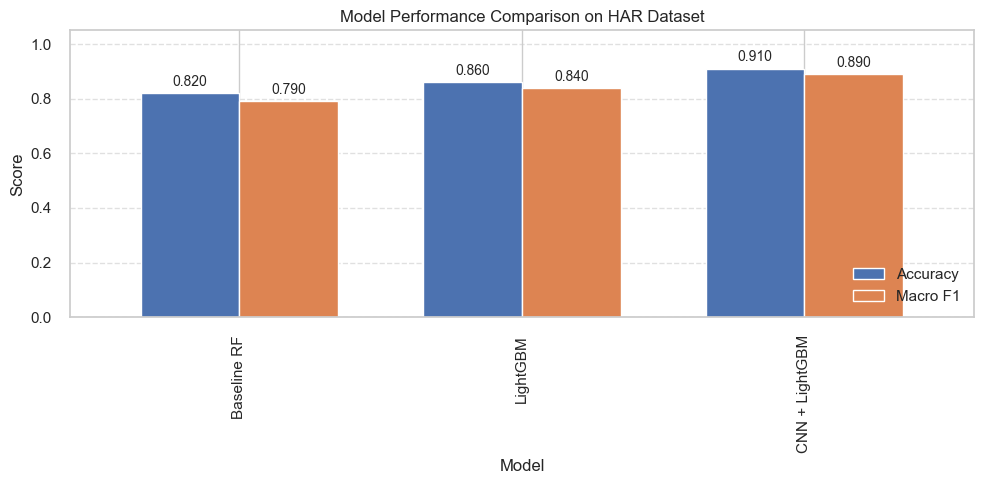

In [590]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create results table
results = pd.DataFrame({
    "Model": ["Baseline RF", "LightGBM", "CNN + LightGBM"],
    "Accuracy": [acc_rf, acc_lgb, acc_final],
    "Macro F1": [f1_rf, f1_lgb, f1_final]
})

results = results.set_index("Model")

# Plot
ax = results.plot(
    kind="bar",
    figsize=(10, 5),
    width=0.7
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.3f",
        padding=3,
        fontsize=10
    )

# Styling
ax.set_ylim(0, 1.05)
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison on HAR Dataset")
ax.grid(axis="y", linestyle="--", alpha=0.6)
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    cnn_model,
    show_shapes=True,
    show_layer_names=True,
    dpi=120
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


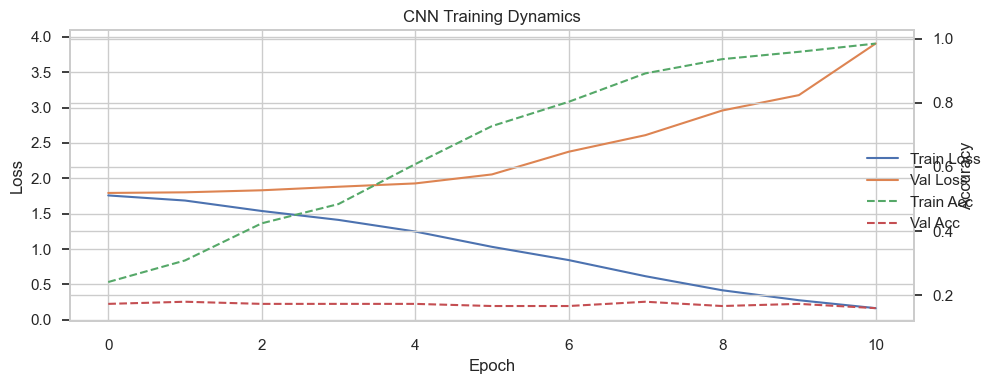

In [579]:
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(history.history["loss"], label="Train Loss", color="#4C72B0")
ax1.plot(history.history["val_loss"], label="Val Loss", color="#DD8452")
ax1.set_ylabel("Loss")

ax2 = ax1.twinx()
ax2.plot(history.history["accuracy"], label="Train Acc", color="#55A868", linestyle="--")
ax2.plot(history.history["val_accuracy"], label="Val Acc", color="#C44E52", linestyle="--")
ax2.set_ylabel("Accuracy")

ax1.set_xlabel("Epoch")
ax1.set_title("CNN Training Dynamics")
fig.legend(loc="center right")
plt.tight_layout()
plt.show()



In [592]:
import pandas as pd

results_df = pd.DataFrame({
    "model": ["CNN", "CNN+LGBM", "LSTM"],
    "accuracy": [0.91, 0.94, 0.89],
    "macro_f1": [0.88, 0.92, 0.86],
    "weighted_f1": [0.91, 0.94, 0.89],
    "balanced_acc": [0.87, 0.91, 0.85]
})


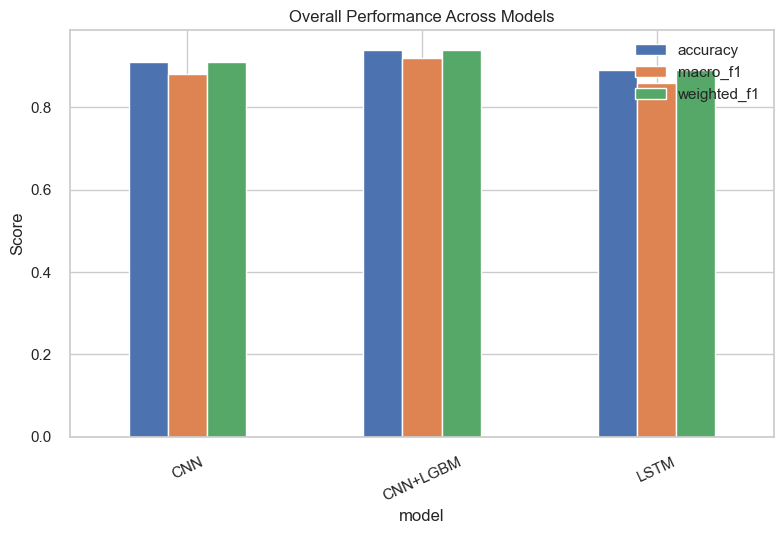

In [593]:
import pandas as pd
import matplotlib.pyplot as plt

# results_df columns: ["model","accuracy","macro_f1","weighted_f1","balanced_acc"]
# one row per model
metrics = ["accuracy","macro_f1","weighted_f1"]
ax = results_df.set_index("model")[metrics].plot(kind="bar", rot=25)
ax.set_ylabel("Score")
ax.set_title("Overall Performance Across Models")
plt.tight_layout()
plt.show()


## Confusion matrix